In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
!pip install psaw
from psaw import PushshiftAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def scrape_data(subreddit): 
    api = PushshiftAPI()

    scrape_list = list(api.search_submissions(subreddit=subreddit,
                                filter=['title', 'subreddit', 'num_comments', 'author', 'subreddit_subscribers', 'score', 'domain', 'created_utc'],
                                limit=15000))

    clean_scrape_lst = []
    for i in range(len(scrape_list)):
        scrape_dict = {}
        scrape_dict['subreddit'] = scrape_list[i][5]
        scrape_dict['author'] = scrape_list[i][0]
        scrape_dict['domain'] = scrape_list[i][2]
        scrape_dict['title'] = scrape_list[i][7]
        scrape_dict['num_comments'] = scrape_list[i][3]
        scrape_dict['score'] = scrape_list[i][4]
        scrape_dict['timestamp'] = scrape_list[i][1]
        clean_scrape_lst.append(scrape_dict)

    print(subreddit, 'subscribers:',scrape_list[1][6])
    
    return clean_scrape_lst

In [ ]:
df_onion = pd.read_csv('/content/the_onion.csv')

df_not_onion = pd.read_csv('/content/not_onion.csv')

# New Section

In [ ]:
print("Shape:", df_onion.shape)
df_onion.head()

Shape: (14868, 8)


,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,Kotaay,google.ca,1,1,TheOnion,1554658622,Jack Nicholson Banned From Sitting Courtside A...
1,1,DisastrousCandy3,theonion.com,3,1,TheOnion,1554600149,NicoDerm Introduces New Nicotine Eye Patch
2,2,SlovenianCat,youtu.be,0,1,TheOnion,1554585700,Last Bastion Of U.S. Economy Succumbs To Pancr...
3,3,MyNameIsGriffon,sports.theonion.com,0,386,TheOnion,1554559311,Tom Izzo Calls 2019 Spartans Best Team He’s Ev...
4,4,MyNameIsGriffon,theonion.com,0,3,TheOnion,1554501708,House Democrats Formally Request Trump’s Tax R...


In [ ]:
print("Shape:", df_not_onion.shape)
df_not_onion.head()

Shape: (15000, 8)


,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,drak0bsidian,cnn.com,0,1,nottheonion,1554663925,Suspected rhino poacher is killed by an elepha...
1,1,somefaces,nypost.com,1,1,nottheonion,1554663648,Taliban commander turns himself in to collect ...
2,2,Sombez,nytimes.com,1,1,nottheonion,1554663558,Rhino Poacher Killed by Elephant and Eaten by ...
3,3,Bayou-Maharaja,ktoo.org,0,1,nottheonion,1554662778,Young shoves female reporter on way to Violenc...
4,4,phantommaster1999,buzz.ie,1,1,nottheonion,1554661988,Poacher hunting rhinos trampled to death by el...


In [ ]:
def clean_data(dataframe):

    dataframe.drop_duplicates(subset='title', inplace=True)
    
    dataframe['title'] = dataframe['title'].str.replace('[^\w\s]',' ')

    dataframe['title'] = dataframe['title'].str.replace('[^A-Za-z]',' ')

    dataframe['title'] = dataframe['title'].str.replace('  ',' ')
    dataframe['title'] = dataframe['title'].str.replace('  ',' ')

    dataframe['title'] = dataframe['title'].str.lower()
    
    print("New shape:", dataframe.shape)
    return dataframe.head()

In [ ]:
clean_data(df_onion)

New shape: (14189, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,Kotaay,google.ca,1,1,TheOnion,1554658622,jack nicholson banned from sitting courtside a...
1,1,DisastrousCandy3,theonion.com,3,1,TheOnion,1554600149,nicoderm introduces new nicotine eye patch
2,2,SlovenianCat,youtu.be,0,1,TheOnion,1554585700,last bastion of u s economy succumbs to pancre...
3,3,MyNameIsGriffon,sports.theonion.com,0,386,TheOnion,1554559311,tom izzo calls spartans best team he s ever t...
4,4,MyNameIsGriffon,theonion.com,0,3,TheOnion,1554501708,house democrats formally request trump s tax r...


In [ ]:
clean_data(df_not_onion)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


New shape: (12086, 8)


,Unnamed: 0,author,domain,num_comments,score,subreddit,timestamp,title
0,0,drak0bsidian,cnn.com,0,1,nottheonion,1554663925,suspected rhino poacher is killed by an elepha...
1,1,somefaces,nypost.com,1,1,nottheonion,1554663648,taliban commander turns himself in to collect ...
2,2,Sombez,nytimes.com,1,1,nottheonion,1554663558,rhino poacher killed by elephant and eaten by ...
3,3,Bayou-Maharaja,ktoo.org,0,1,nottheonion,1554662778,young shoves female reporter on way to violenc...
4,4,phantommaster1999,buzz.ie,1,1,nottheonion,1554661988,poacher hunting rhinos trampled to death by el...


In [ ]:
pd.DataFrame([df_onion.isnull().sum(),df_not_onion.isnull().sum()], index=["TheOnion","notheonion"]).T

,TheOnion,notheonion
Unnamed: 0,0,0
author,0,0
domain,0,0
num_comments,0,0
score,0,0
subreddit,0,0
timestamp,0,0
title,0,0


In [ ]:
def bar_plot(x, y, title, color):    
    
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    totals = []

    for p in ax.patches:
        totals.append(p.get_width())

    total = sum(totals)

    for p in ax.patches:
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

In [ ]:
df = pd.concat([df_onion[['subreddit', 'title']], df_not_onion[['subreddit', 'title']]], axis=0)

df = df.reset_index(drop=True)

df.head(2)

,subreddit,title
0,TheOnion,jack nicholson banned from sitting courtside a...
1,TheOnion,nicoderm introduces new nicotine eye patch


In [ ]:
df.tail(2)

,subreddit,title
26273,nottheonion,farming simulator starts up esports with k pri...
26274,nottheonion,mark zuckerberg killed goat with laser gun and...


In [ ]:
df["subreddit"] = df["subreddit"].map({"nottheonion": 0, "TheOnion": 1})

print(df.shape)

df.head(2)

(26275, 2)


,subreddit,title
0,1,jack nicholson banned from sitting courtside a...
1,1,nicoderm introduces new nicotine eye patch


In [ ]:
df.tail(2)

,subreddit,title
26273,0,farming simulator starts up esports with k pri...
26274,0,mark zuckerberg killed goat with laser gun and...


In [ ]:
mask_on = df['subreddit'] == 1
df_onion_titles = df[mask_on]['title']

cv1 = CountVectorizer(stop_words = 'english')

onion_cvec = cv1.fit_transform(df_onion_titles)

onion_cvec_df = pd.DataFrame(onion_cvec.toarray(),
                   columns=cv1.get_feature_names())

print(onion_cvec_df.shape)

(14189, 11906)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
mask_no = df['subreddit'] == 0
df_not_onion_titles = df[mask_no]['title']

cv2 = CountVectorizer(stop_words = 'english')

not_onion_cvec = cv2.fit_transform(df_not_onion_titles)

not_onion_cvec_df = pd.DataFrame(not_onion_cvec.toarray(),
                   columns=cv2.get_feature_names())

print(not_onion_cvec_df.shape)

(12086, 14451)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


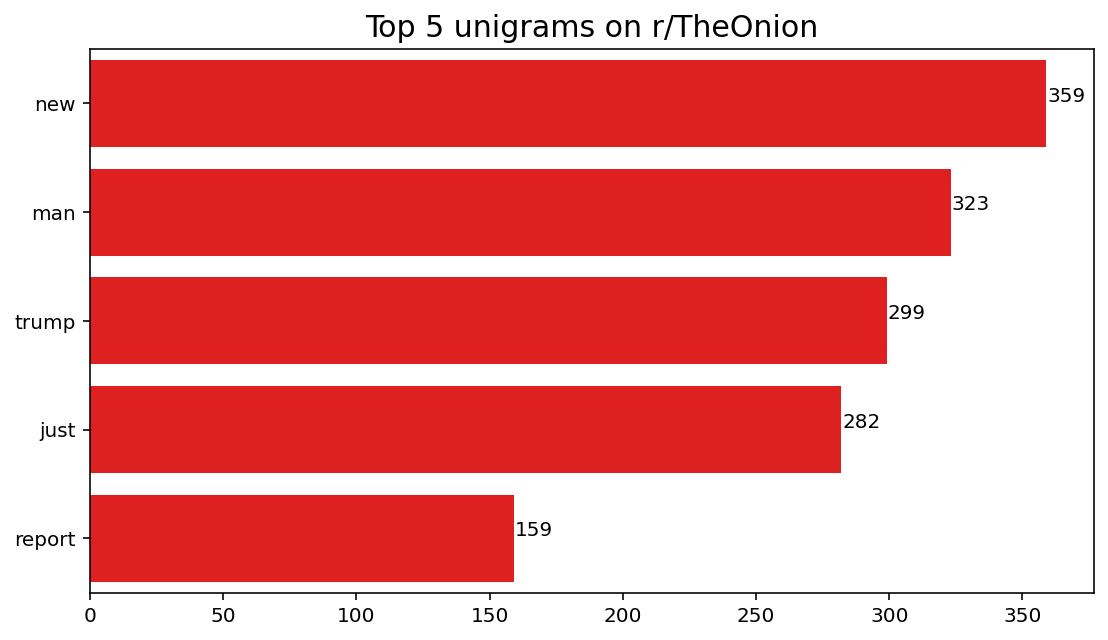

In [ ]:
onion_wc = onion_cvec_df.sum(axis = 0)
onion_top_5 = onion_wc.sort_values(ascending=False).head(5)

bar_plot(onion_top_5.values, onion_top_5.index, 'Top 5 unigrams on r/TheOnion','r') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


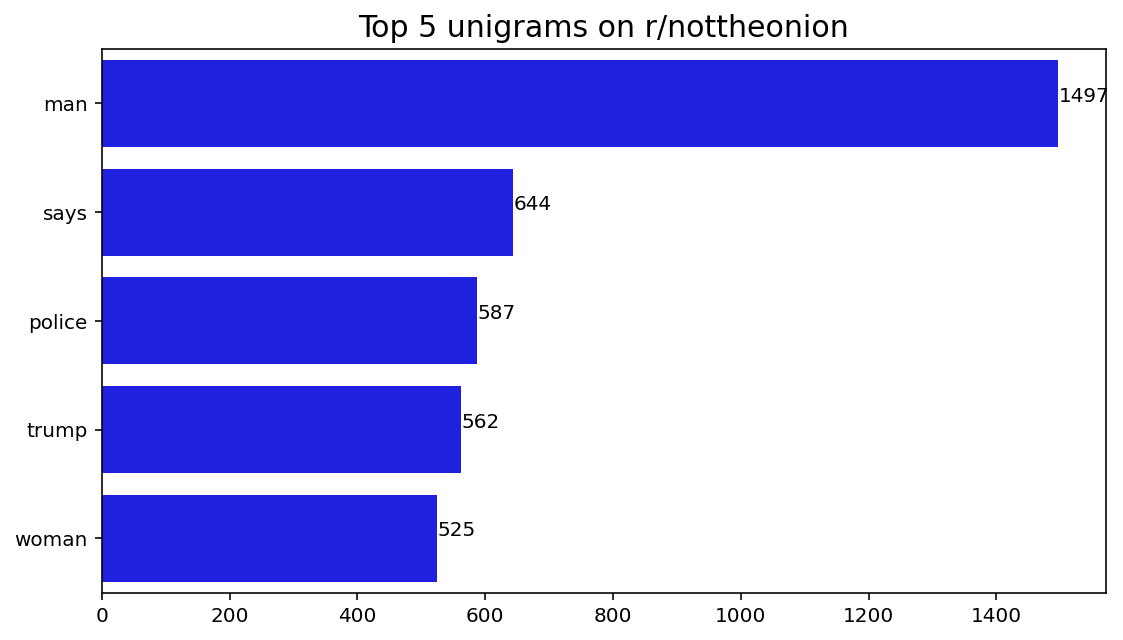

In [ ]:
nonion_wc = not_onion_cvec_df.sum(axis = 0)
nonion_top_5 = nonion_wc.sort_values(ascending=False).head(5)

bar_plot(nonion_top_5.values, nonion_top_5.index, 'Top 5 unigrams on r/nottheonion','b') 

In [ ]:
not_onion_5_set = set(nonion_top_5.index)
onion_5_set = set(onion_top_5.index)


common_unigrams = onion_5_set.intersection(not_onion_5_set)
common_unigrams

{'man', 'trump'}

In [ ]:
mask = df['subreddit'] == 1
df_onion_titles = df[mask]['title']

cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

onion_cvec = cv.fit_transform(df_onion_titles)

onion_cvec_df = pd.DataFrame(onion_cvec.toarray(),
                   columns=cv.get_feature_names())

print(onion_cvec_df.shape)

(14189, 34896)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
mask = df['subreddit'] == 0
df_not_onion_titles = df[mask]['title']

cv = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

not_onion_cvec = cv.fit_transform(df_not_onion_titles)

not_onion_cvec_df = pd.DataFrame(not_onion_cvec.toarray(),
                   columns=cv.get_feature_names())

print(not_onion_cvec_df.shape)

(12086, 58973)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


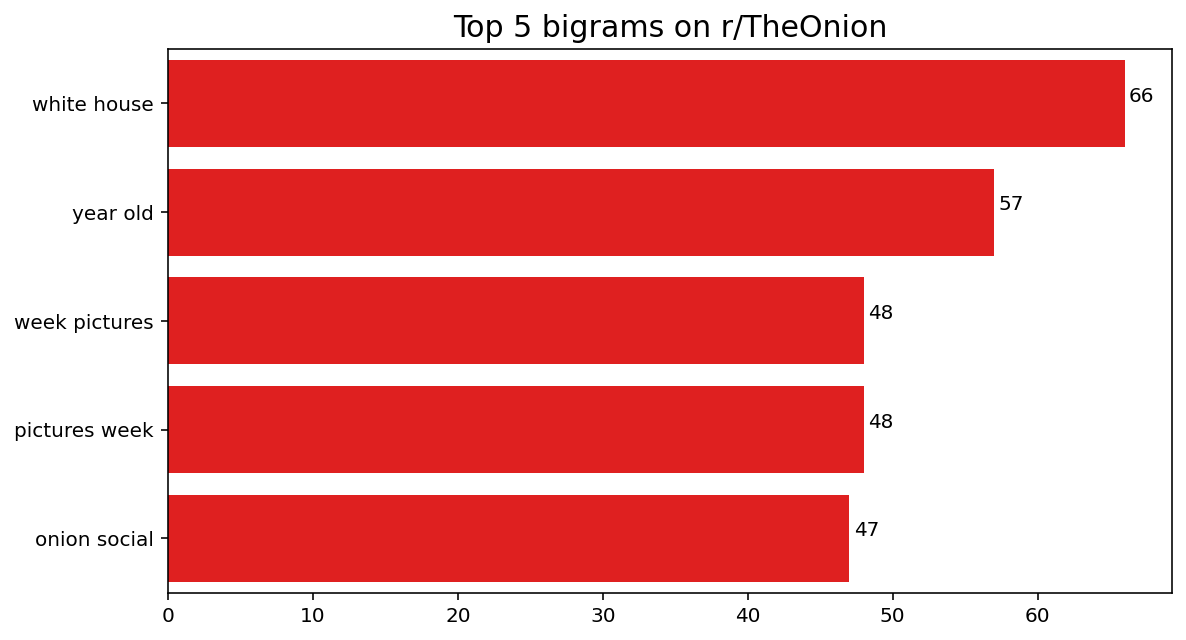

In [ ]:
onion_wc = onion_cvec_df.sum(axis = 0)
onion_top_5 = onion_wc.sort_values(ascending=False).head(5)


bar_plot(onion_top_5.values, onion_top_5.index, 'Top 5 bigrams on r/TheOnion','r') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


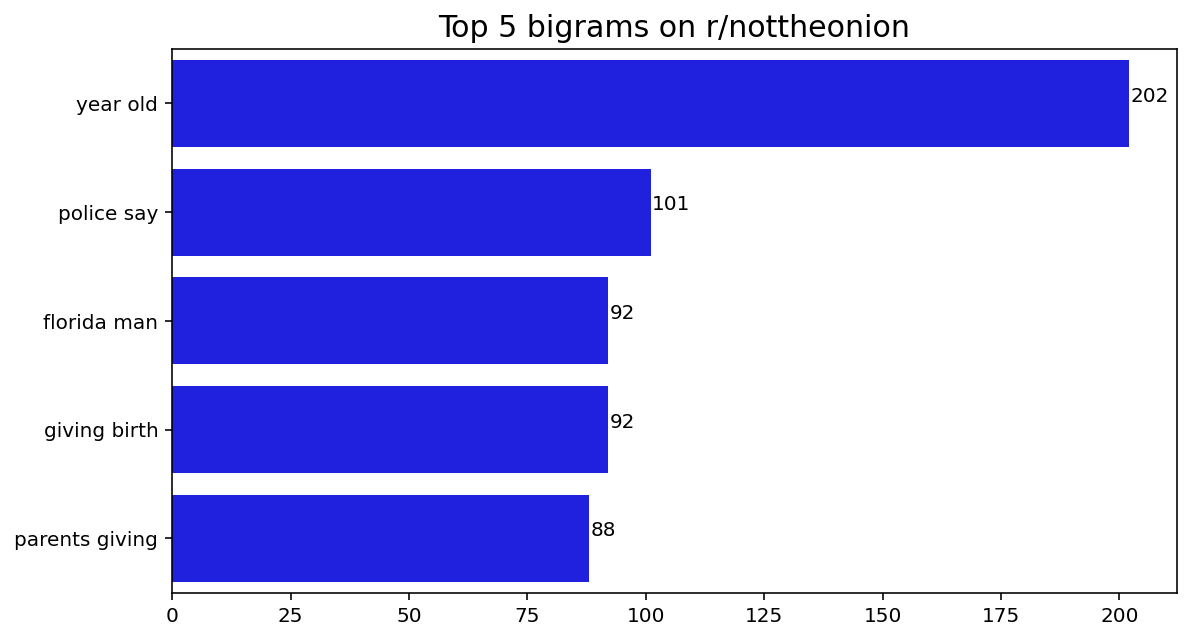

In [ ]:
nonion_wc = not_onion_cvec_df.sum(axis = 0)
nonion_top_5 = nonion_wc.sort_values(ascending=False).head(5)

bar_plot(nonion_top_5.values, nonion_top_5.index, 'Top 5 bigrams on r/nottheonion','b') 

In [ ]:
not_onion_5_list = set(nonion_top_5.index)
onion_5_list = set(onion_top_5.index)

common_bigrams = onion_5_list.intersection(not_onion_5_list)
common_bigrams

{'year old'}

In [ ]:
custom = _stop_words.ENGLISH_STOP_WORDS
custom = list(custom)
common_unigrams = list(common_unigrams)
common_bigrams = list(common_bigrams)

for i in common_unigrams:
    custom.append(i)

    
for i in common_bigrams:
    split_words = i.split(" ")
    for word in split_words:
        custom.append(word)

In [ ]:
df['subreddit'].value_counts(normalize=True)

1    0.540019
0    0.459981
Name: subreddit, dtype: float64

In [ ]:
X = df['title']
y = df['subreddit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
nb = MultinomialNB(alpha = 0.36)
cvec = CountVectorizer(ngram_range= (1, 3))

cvec.fit(X_train)

Xcvec_train = cvec.transform(X_train)
Xcvec_test = cvec.transform(X_test)

nb.fit(Xcvec_train,y_train)

preds = nb.predict(Xcvec_test)

print(nb.score(Xcvec_test, y_test))

0.8972446338864363


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, preds)
cnf_matrix

array([[2701,  321],
       [ 354, 3193]])

Text(0.5, 257.44, 'Predicted label')

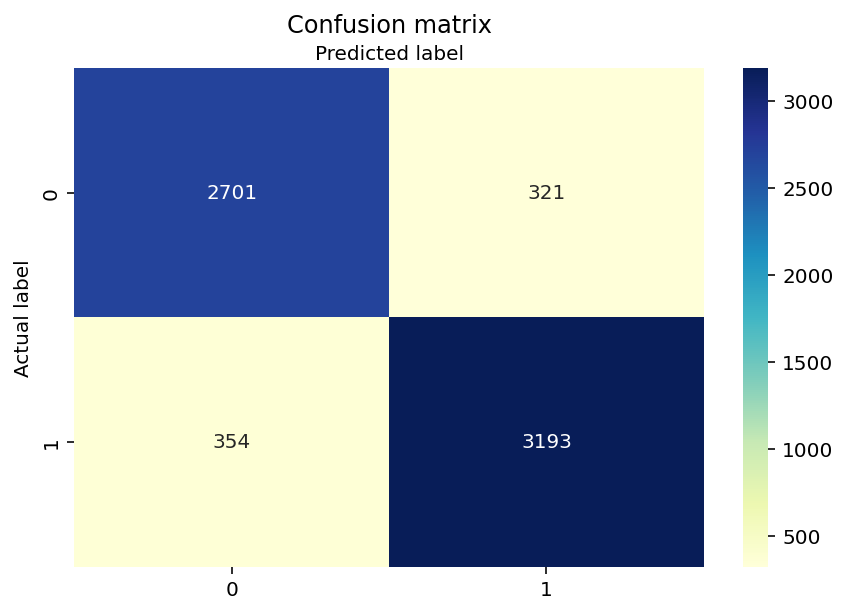

In [ ]:
class_names=[0,1] 

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
cnf_matrix = np.array(cnf_matrix).tolist()

tn_fp, fn_tp = cnf_matrix

tn, fp = tn_fp
fn, tp = fn_tp

In [ ]:
print("Accuracy:",round(metrics.accuracy_score(y_test, preds)*100, 2),'%')
print("Precision:",round(metrics.precision_score(y_test, preds)*100, 2), '%')
print("Recall:",round(metrics.recall_score(y_test, preds)*100, 2), '%')
print("Specificity:", round((tn/(tn+fp))*100, 2), '%')
print("Misclassification Rate:", round((fp+fn)/(tn+fp+fn+tn)*100, 2), '%')

Accuracy: 89.72 %
Precision: 90.87 %
Recall: 90.02 %
Specificity: 89.38 %
Misclassification Rate: 11.11 %
